In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 
# 0 - Tumor
# 1 - Normal


OneHotEncoder()

In [12]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'C:\Users\Jony\Brain MRI Images\brain_tumor_dataset\yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [15]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r'C:\Users\Jony\Brain MRI Images\brain_tumor_dataset\no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [16]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [17]:
result = np.array(result)
result = result.reshape(139,2)

In [18]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [19]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [20]:
y_train.shape

(111, 2)

In [21]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 10s 3s/step - loss: 40.2524 - val_loss: 50.7489
Epoch 2/30
3/3 [==============================] - 7s 2s/step - loss: 23.6669 - val_loss: 51.4111
Epoch 3/30
3/3 [==============================] - 7s 2s/step - loss: 4.3422 - val_loss: 65.0944
Epoch 4/30
3/3 [==============================] - 7s 2s/step - loss: 4.6716 - val_loss: 37.4874
Epoch 5/30
3/3 [==============================] - 7s 2s/step - loss: 2.3828 - val_loss: 17.8577
Epoch 6/30
3/3 [==============================] - 7s 2s/step - loss: 2.4390 - val_loss: 23.8477
Epoch 7/30
3/3 [==============================] - 7s 2s/step - loss: 2.4935 - val_loss: 29.3336
Epoch 8/30
3/3 [==============================] - 7s 2s/step - loss: 1.5802 - val_loss: 22.9483
Epoch 9/30
3/3 [==============================] - 7s 3s/step - loss: 0.1551 - val_loss: 15.9363
Epoch 10/30
3/3 [==============================] - 7s 2s/step - loss: 0.8108 - val_loss: 12.9780
Epoch 11/30
3/3 [===================

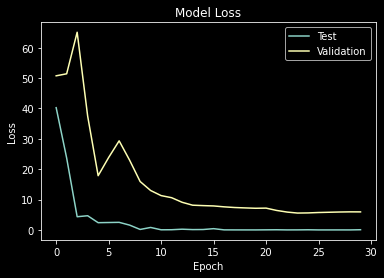

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [23]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor


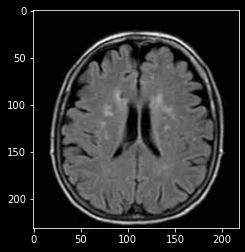

In [25]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\Jony\Brain MRI Images\brain_tumor_dataset\no\17 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

99.7055172920227% Confidence This Is A Its a Tumor


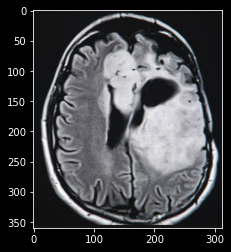

In [27]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\Jony\Brain MRI Images\brain_tumor_dataset\yes\Y16.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))